# Acidentes de trânsito na Autopista Fernão Dias

In [115]:
from google.colab import files

uploaded = files.upload()

Saving AUTOPISTA_FERNO_DIAS.csv to AUTOPISTA_FERNO_DIAS (5).csv


In [139]:
import pandas as pd
import chardet

### Carregando o dataset completo, a partir de um arquivo csv, em uma variável

In [141]:
dtype_dict = {'Coluna2': float, 'Coluna3': float, 'Coluna4': float}

with open('AUTOPISTA_FERNO_DIAS (5).csv', 'rb') as f:
    result = chardet.detect(f.read())

In [142]:
autopista = pd.read_csv('AUTOPISTA_FERNO_DIAS (5).csv', encoding=result['encoding'], skiprows=4, delimiter=',')

<ipython-input-142-b7a810395dd4>:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  autopista = pd.read_csv('AUTOPISTA_FERNO_DIAS (5).csv', encoding=result['encoding'], skiprows=4, delimiter=',')


### Imprimindo na tela o conteúdo do dataset


In [143]:
autopista = autopista.fillna(0) #Coloca valores nulos como 0

colunas = ['ano', 'horario', 'tipo_de_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente', 'automovel', 'bicicleta', 'caminhão', 'moto', 'onibus', 'ilesos', 'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos']

# Atribuir os rótulos ao DataFrame
autopista.columns = colunas

# Exibir as primeiras linhas do DataFrame
print(autopista.head())

    ano  horario tipo_de_ocorrencia                   km trecho  sentido  \
0  2010        0                  0                923.5      0        1   
1  2010        0                  0                  527      0        1   
2  2010        0                  0  895.299.987.792.969      0        0   
3  2010        0                  0                  480      0        0   
4  2010        0                  0                  874      0        1   

                            tipo_de_acidente  automovel  bicicleta  caminhão  \
0              Choque - Elemento de Drenagem          0          0         0   
1                             Saida de Pista          0          0         1   
2  Choque - Defensa barreira ou "submarino"           1          0         0   
3                           Colisao Traseira          2          0         0   
4                    Atropelamento de Animal          1          0         0   

   moto  onibus  ilesos  levemente_feridos  moderadamente_feri

### Definindo apenas o atributo DATA para o dataframe autopistaDF e imprimindo-o na tela
### Excluir as colunas que não vamos utilizar

In [144]:
autopistaDf = pd.DataFrame(autopista['ano'])
autopistaDf

,ano
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
108487,2023
108488,2023
108489,2023
108490,2023


### Adicionando ao dataframe o atributo Sexo e imprimindo na tela

In [145]:
autopistaDf['hora'] = autopista['horario']
autopistaDf['tipo de ocorrencia'] = autopista['tipo_de_ocorrencia']
autopistaDf['trecho'] = autopista['trecho']
autopistaDf['sentido'] = autopista['sentido']
autopistaDf['tipo de acidente'] = autopista['tipo_de_acidente']
autopistaDf['automovel'] = autopista['automovel']
autopistaDf['bicicleta'] = autopista['bicicleta']
autopistaDf['caminhão'] = autopista['caminhão']
autopistaDf['moto'] = autopista['moto']
autopistaDf['onibus'] = autopista['onibus']
autopistaDf['ilesos'] = autopista['ilesos']
autopistaDf['levemente_feridos'] = autopista['levemente_feridos']
autopistaDf['moderadamente_feridos'] = autopista['moderadamente_feridos']
autopistaDf['gravemente_feridos'] = autopista['gravemente_feridos']
autopistaDf['mortos'] = autopista['mortos']
autopistaDf

,ano,hora,tipo de ocorrencia,trecho,sentido,tipo de acidente,automovel,bicicleta,caminhão,moto,onibus,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
0,2010,0,0,0,1,Choque - Elemento de Drenagem,0,0,0,0,0,1,0,0,0,0
1,2010,0,0,0,1,Saida de Pista,0,0,1,0,0,1,0,0,0,0
2,2010,0,0,0,0,"Choque - Defensa barreira ou ""submarino""",1,0,0,0,0,1,0,0,0,0
3,2010,0,0,0,0,Colisao Traseira,2,0,0,0,0,2,0,0,0,0
4,2010,0,0,0,1,Atropelamento de Animal,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108487,2023,17,0,0,0,Colisao traseira,2,0,0,0,0,2,0,0,0,0
108488,2023,17,0,0,0,Choque,1,0,0,0,0,0,0,0,0,0
108489,2023,18,0,0,0,Colisao lateral no mesmo sentido,1,0,0,0,0,1,0,0,0,0
108490,2023,19,0,0,1,Choque,0,0,0,0,0,0,0,0,0,0


### Transformando o tipo de acidenteo em um atributo numérico que o algoritmo pode utilizar

In [166]:
autopistaDf.replace({'Saida de Pista': 0,
                     'Outros - Sequencia': 1,
                     'Choque - Defensa barreira ou "submarino" ': 2,
                     'Choque - Elemento de Drenagem': 3,
                     'Colisao traseira': 4,
                     'Colisao Traseira': 4,
                     'Atropelamento de Animal': 5,
                     'Engavetamento': 6,
                     'Capotamento': 7,
                     'Queda de Moto': 8,
                     'Colisao Lateral': 9,
                     'Choque - Suporte de Sinalizacao': 10,
                     'Outros': 11,
                     'Tombamento': 12,
                     'Colisao Frontal': 13,
                     'Atropelamento - Morador': 14,
                     'Choque - Talude': 15,
                     'Choque - Objeto sobre a pista': 16,
                     'Atropelamento - Andarilho': 17,
                     'Atropelamento - Ciclista': 18,
                     'Choque - Poste': 19,
                     'Atropelamento - Usuario': 20,
                     'Choque - Veiculo parado no acostamento': 21,
                     'Choque - Cancela de Pedagio': 22,
                     'Choque - Arvore': 23,
                     'Choque - Veiculo parado na pista': 24,
                     'Atropelamento - Ambulante': 25,
                     'Acidentes de outra natureza': 26,
                     'Atropelamento - Funcionario': 27,
                     'Atropelamento de pedestre': 28,
                     'Atropelamento - Sem Informacao': 29,
                     'Objeto lancado contra veiculo': 30,
                     'Colisao Transversal': 31,
                     'Soterramento': 32,
                     'Choque - outros': 33,
                     'Atropelamento - Outros': 34,
                     'Choque - Objeto nao identificado': 35,
                     'Choque': 36,
                     'Colisao lateral no mesmo sentido':37}, inplace=True)


autopistaDf

,ano,hora,tipo de ocorrencia,trecho,sentido,tipo de acidente,automovel,bicicleta,caminhão,moto,onibus,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
0,2010,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0
1,2010,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,2010,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0
3,2010,0,0,0,0,4,2,0,0,0,0,2,0,0,0,0
4,2010,0,0,0,1,5,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108487,2023,17,0,0,0,4,2,0,0,0,0,2,0,0,0,0
108488,2023,17,0,0,0,36,1,0,0,0,0,0,0,0,0,0
108489,2023,18,0,0,0,37,1,0,0,0,0,1,0,0,0,0
108490,2023,19,0,0,1,36,0,0,0,0,0,0,0,0,0,0


## Construindo gráficos para visualizar possíveis correlações entre variáveis

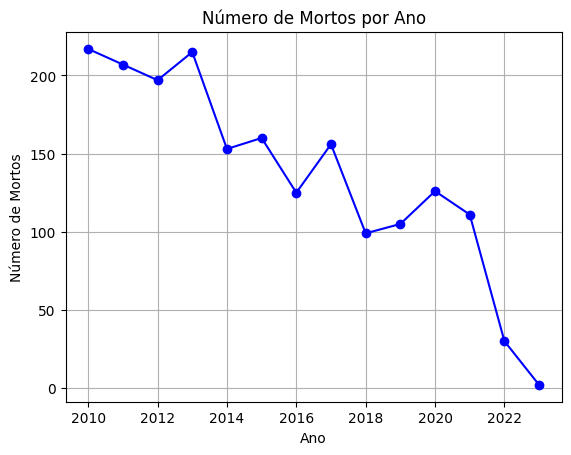

In [208]:
# Agrupar por ano e calcular o total de mortos
dados_agrupados = autopistaDf.groupby('ano')['mortos'].sum()

# Dados para o gráfico
anos = dados_agrupados.index
mortos = dados_agrupados.values

# Plotagem do gráfico
plt.plot(anos, mortos, marker='o', linestyle='-', color='b')

# Configurações do gráfico
plt.title("Número de Mortos por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Mortos")
plt.grid(True)
plt.show()

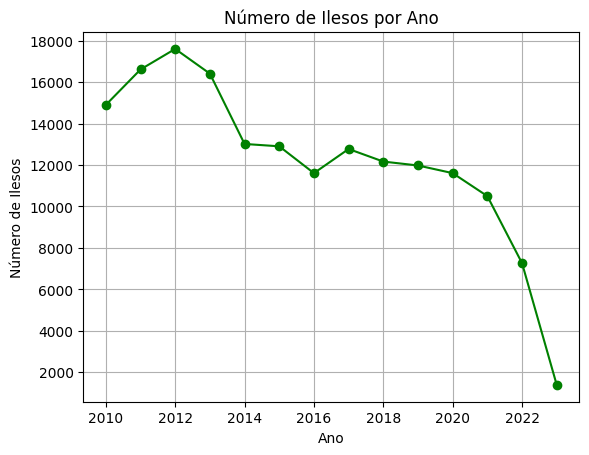

In [209]:
import matplotlib.pyplot as plt


# Agrupar por ano e calcular o total de ilesos
dados_agrupados = autopistaDf.groupby('ano')['ilesos'].sum()

# Dados para o gráfico
anos = dados_agrupados.index
ilesos = dados_agrupados.values

# Plotagem do gráfico
plt.plot(anos, ilesos, marker='o', linestyle='-', color='g')

# Configurações do gráfico
plt.title("Número de Ilesos por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Ilesos")
plt.grid(True)
plt.show()


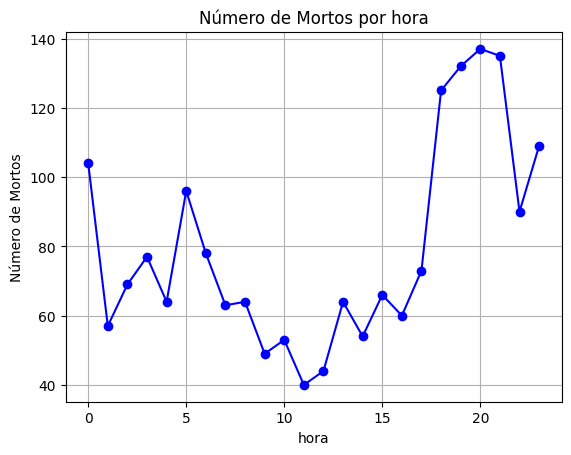

In [210]:
# Agrupar por ano e calcular o total de mortos
dados_agrupados = autopistaDf.groupby('hora')['mortos'].sum()

# Dados para o gráfico
hora = dados_agrupados.index
mortos = dados_agrupados.values

# Plotagem do gráfico
plt.plot(hora, mortos, marker='o', linestyle='-', color='b')

# Configurações do gráfico
plt.title("Número de Mortos por hora")
plt.xlabel("hora")
plt.ylabel("Número de Mortos")
plt.grid(True)
plt.show()

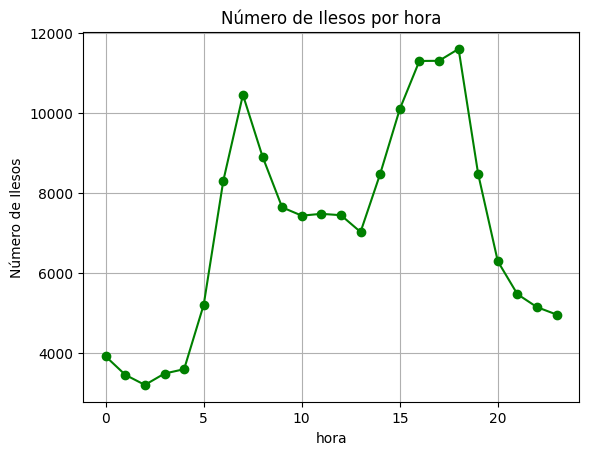

In [211]:
# Agrupar por hora e calcular o total de ilesos
dados_agrupados = autopistaDf.groupby('hora')['ilesos'].sum()

# Dados para o gráfico
hora = dados_agrupados.index
ilesos = dados_agrupados.values

# Plotagem do gráfico
plt.plot(hora, ilesos, marker='o', linestyle='-', color='g')

# Configurações do gráfico
plt.title("Número de Ilesos por hora")
plt.xlabel("hora")
plt.ylabel("Número de Ilesos")
plt.grid(True)
plt.show()

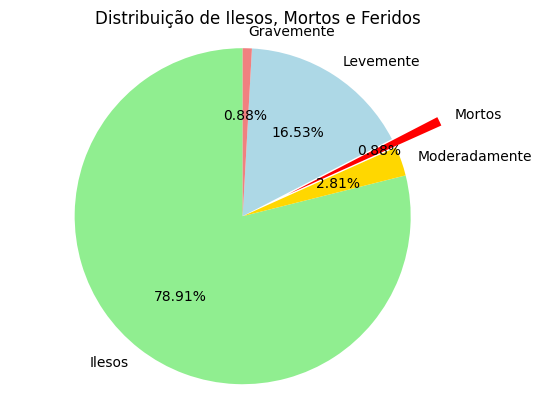

In [231]:
total_ilesos = autopistaDf['ilesos'].sum()
total_mortos = autopistaDf['mortos'].sum()
total_levemente_feridos = autopistaDf['levemente_feridos'].sum()
total_moderadamente_feridos = autopistaDf['moderadamente_feridos'].sum()
total_gravemente_feridos = autopistaDf['gravemente_feridos'].sum()

labels = ['Ilesos', 'Moderadamente', 'Mortos', 'Levemente', 'Gravemente']
sections = [total_ilesos, total_moderadamente_feridos, total_mortos, total_levemente_feridos, total_gravemente_feridos]
colors = ['lightgreen', 'gold', 'red', 'lightblue', 'lightcoral']

# Ajuste o explode para afastar a fatia 'Moderadamente' e 'Gravemente'
explode = (0, 0, 0.3, 0, 0)

# Plotagem do gráfico de pizza
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode=explode,
        autopct='%1.2f%%')

plt.axis('equal')
plt.title('Distribuição de Ilesos, Mortos e Feridos')
plt.show()